# Examen Final (3:34 P.M.)

In [1]:
!pip install arch statsmodels --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 14.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from arch import arch_model
from statsmodels.tsa.stattools import adfuller, kpss, zivot_andrews
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## Reusable functions
# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("INTERPRETATION:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("INTERPRETATION:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Plot the series
def plot(series_1, series_2, name_1, name_2):
  plt.figure(figsize=(12,6))
  plt.plot(series_1, label=name_1)
  plt.plot(series_2, label=name_2)
  plt.title(f'{name_1} {name_2} Series')
  plt.legend()
  plt.show()

# Cointegration test with interpretation
def cointegration_test(df, ticker_1, ticker_2):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("INTERPRETATION:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print(f"Conclusion: {ticker_1} and {ticker_2} are cointegrated - they share a long-run equilibrium relationship")
    else:
        print(f"Conclusion: No evidence of cointegration between {ticker_1} and {ticker_2}")

# Function to plot correlograms with interpretation
def plot_correlograms(series, name, lags=30):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF for {name}')
    plt.subplot(2, 1, 2)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF for {name}')
    plt.tight_layout()
    plt.show()
    print(f"\nCorrelogram Interpretation for {name}:")
    print("  - ACF: Shows total correlation at each lag, including indirect effects")
    print("  - PACF: Shows direct correlation at each lag, controlling for earlier lags")
    print("  - Significant spikes outside the blue confidence interval suggest strong correlations")
    print("  - ACF decay pattern indicates potential ARIMA model orders")
    print("  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order")

In [3]:
data_df = pd.read_excel("./Datos Problema 19.xlsx")
three_months_interest = data_df["GS3M"]
six_months_interest = data_df["GS6M"]

In [5]:
three_months_interest

,GS3M
0,12.92
1,14.28
2,13.31
3,13.34
4,12.71
...,...
229,5.01
230,4.54
231,3.97
232,3.70


In [6]:
six_months_interest

,GS6M
0,13.90
1,14.81
2,13.83
3,13.87
4,13.13
...,...
229,4.89
230,4.44
231,3.99
232,3.74


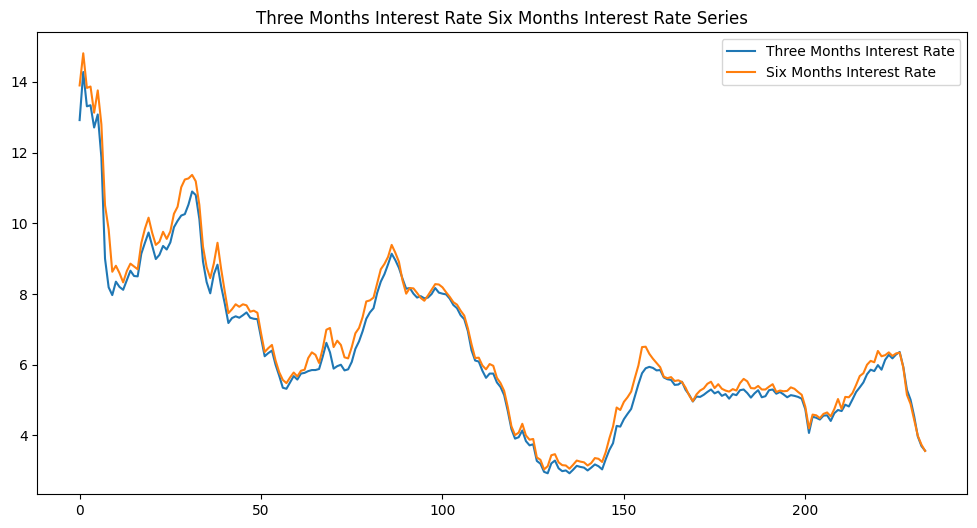

In [4]:
plot(three_months_interest, six_months_interest, "Three Months Interest Rate", "Six Months Interest Rate")

In [7]:
unit_root_tests(three_months_interest, "Three Months Interest Rate")
unit_root_tests(six_months_interest, "Six Months Interest Rate")


Unit Root Tests for Three Months Interest Rate:
ADF Test:
ADF Statistic: -1.5392
p-value: 0.5140
Critical Values: {'1%': np.float64(-3.460018927623594), '5%': np.float64(-2.8745897386146817), '10%': np.float64(-2.57372514086348)}
INTERPRETATION:
  - p-value >= 0.05: Fail to reject null - Three Months Interest Rate may be non-stationary

KPSS Test:
KPSS Statistic: 1.4540
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
INTERPRETATION:
  - p-value < 0.05: Reject null hypothesis - Three Months Interest Rate is non-stationary

Unit Root Tests for Six Months Interest Rate:
ADF Test:
ADF Statistic: -3.7738
p-value: 0.0032
Critical Values: {'1%': np.float64(-3.458854867412691), '5%': np.float64(-2.8740800599399323), '10%': np.float64(-2.573453223097503)}
INTERPRETATION:
  - p-value < 0.05: Reject null hypothesis - Six Months Interest Rate is stationary

KPSS Test:
KPSS Statistic: 1.4961
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%

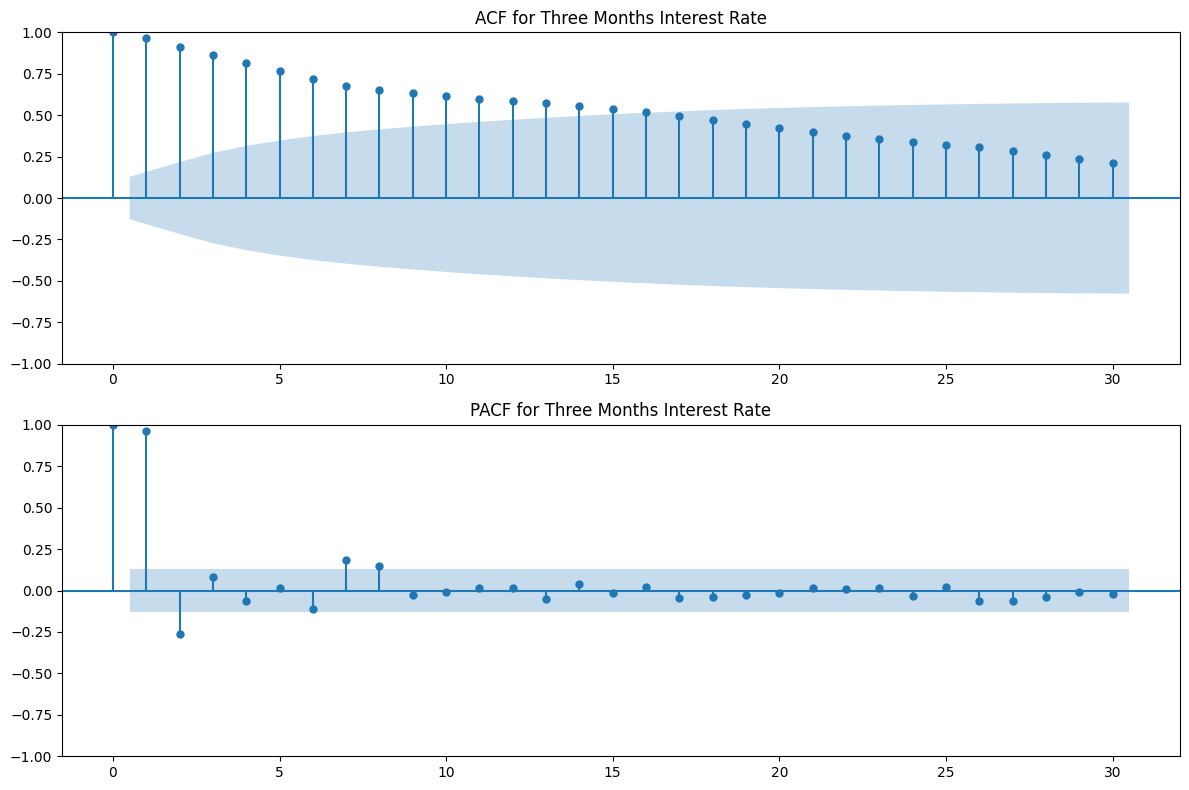


Correlogram Interpretation for Three Months Interest Rate:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order


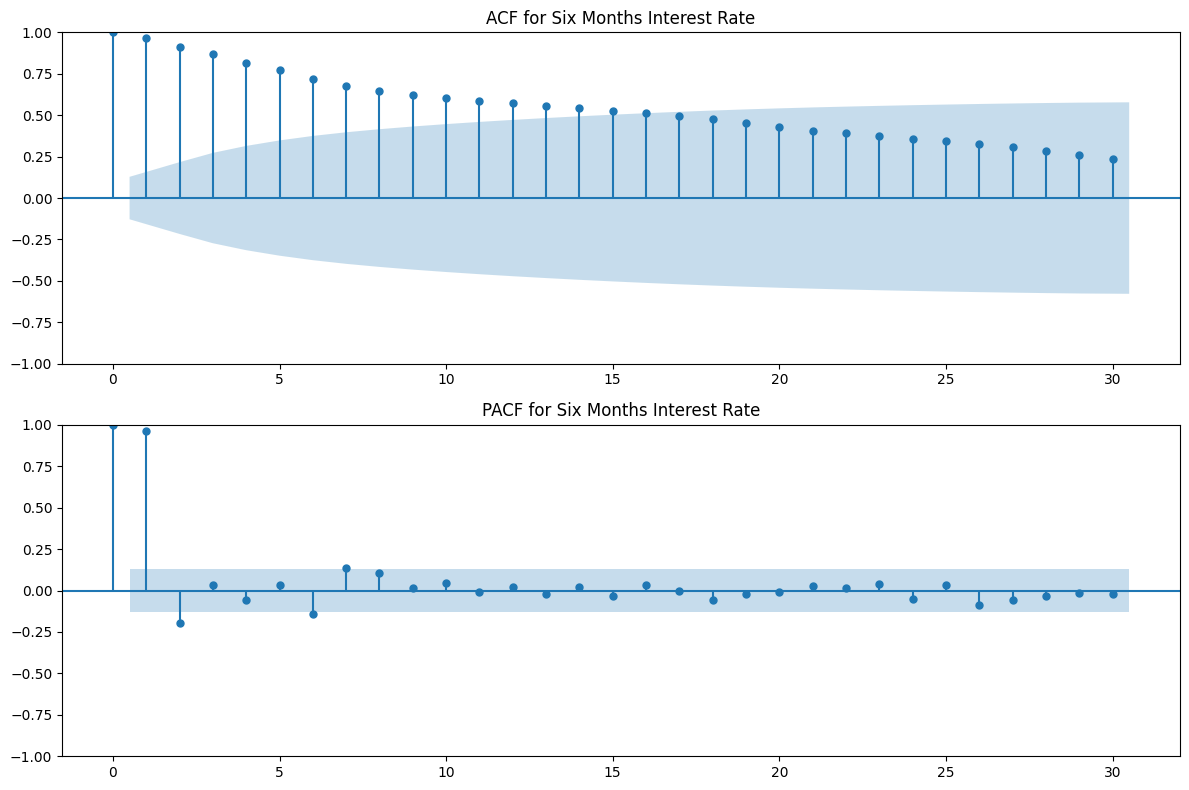


Correlogram Interpretation for Six Months Interest Rate:
  - ACF: Shows total correlation at each lag, including indirect effects
  - PACF: Shows direct correlation at each lag, controlling for earlier lags
  - Significant spikes outside the blue confidence interval suggest strong correlations
  - ACF decay pattern indicates potential ARIMA model orders
  - PACF cutoff suggests AR order, while ACF cutoff suggests MA order


In [9]:
plot_correlograms(three_months_interest, "Three Months Interest Rate")
plot_correlograms(six_months_interest, "Six Months Interest Rate")

In [11]:
coint_df = pd.DataFrame({
    'three_months_interest_rate': three_months_interest,
    'six_months_interest_rate': six_months_interest
}).dropna()

cointegration_test(coint_df, "Three Months Interest Rate", "Six Months Interest Rate")


Johansen Cointegration Test:
Trace statistic: [52.36462346 15.02232689]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
INTERPRETATION:
  - r = 0: Cointegration exists at 95% confidence level
    Trace statistic (52.36) > 95% critical value (15.49)
  - r = 1: Cointegration exists at 95% confidence level
    Trace statistic (15.02) > 95% critical value (3.84)
Conclusion: Three Months Interest Rate and Six Months Interest Rate are cointegrated - they share a long-run equilibrium relationship


## Interpretaciones

### Trace la gráfica de las dos series de tiempo en el mismo diagrama, ¿qué observa?
Se observa que las tasas de interés de los pagarés a tres y seis meses presentan un comportamiento altamente correlacionado a lo largo del tiempo. Cuando una aumenta, la otra tiene a incrementarse también, y cuando una disminuye, la otra sigue la misma tendencia. Este comportamiento sincronizado es esperado en entornos económicos "normales", dado que ambas tasas reflejan condiciones similares de mercado y expectativas de los agentes económicos. SIn embargo, la evidencia visual es fundamental para confirmar que esta relación se mantuvo durante el periodo analizado.

### Realice un análisis formal de raíz unitaria para ver si estas series de tiempo son estacionarias.
Se aplicaron las pruebas de raíz unitaria ADF y KPSS para verificar la estacionariedad de las series de tiempo.

**Resultados para las tasas de interés de pagarés a tres meses**
1. La prueba ADF no proporcionó evidencia estadística suficiente para rechazar la hipótesis nula, lo que indica la presencia de una raíz unitaria, y por ende, que la serie no es estacionaria.
2. La prueba KPSS rechazó la hipótesis nula, sugiriendo que la serie no es estacionaria alrededor de una tendencia determinista.

Ambos resultados apuntan a la misma conclusión: la serie original no es estacionaria.

**Resultados para las tasas de interés de pagarés a seis meses**
1. La prueba ADF proporcionó evidencia estadística suficiente para rechazar la hipótesis nula, lo que indica que la serie de tiempo es estacionaria.
2. La prueba KPSS rechazó la hipótesis nula, sugiriendo que la serie no es estacionaria alrededor de una tendencia determinista.

Los resultados apuntaron en direcciones opuestas, por lo que se pretenden analizar los correlogramas para obtener más evidencia respecto a las propiedades estadísticas de la serie de tiempo.

**Interpretación de correlogramas**

Los niveles de significancia de los correlogramas ACF decaen lentamente, lo que sugiere que ambas series de tiempo no son estacionarias. En cambio, los correlogramas PACF presenta una caída abrupta después del rezago 1, lo que indica que un modelo autorregresivo de orden 1 AR(1), podría capturar parte de la dinámica de la serie.

Es importante destacar que los correlogramas son una herramienta exploratoria inicial para identificar posibles modelos, pero la selección definitiva debe basarse en un análisis más amplio, que incluya inspección visual, diagnóstico de residuos y criterios de información.

### ¿Están cointegradas las dos series de tiempo? ¿Cómo sabe? Realice los cálculos necesarios.
En este caso, la prueba arrojó dos estadísticos: 52.36 para la hipótesis de que no existe cointegración alguna (K0 = 0) y 15.02 para la hipótesis de que existe como máximo una relación de cointegración (K0 = 1). Estos valores se comparan con los umbrales críticos de 15.49 y 3.84, respectivamente, con un nivel de confianza del 95%.

Dado que ambos estadísticos de prueba son mayores que sus valores críticos correspondientes, se rechaza la hipótesis nula para ambos casos. Sin embargo, dado que el máximo posible de relaciones de cointegración en un conjunto de dos series de tiempo es uno (K0 = 1), el rechazo de K0 = 1 carece de interpretación adicional. En este contexto, el rechazo de K0 = 0 basta para concluir que existe evidencia estadística de una relación de cointegración entre los precios de las acciones cada minuto. En la práctica, las tasas de interés de pagarés para tres y seis meses parecen fluctuar conjuntamente de forma que mantienen una relación consistente a largo plazo.

Cabe señalar que también se calculó K0 = 1 por norma metodológica, ya que el procedimiento de Johansen evalúa secuencialmente todos los posibles valores de K0. Sin embargo, en este caso, dicho contraste resulta redundante, pues se rechaza H0: K0 = 0, lo que implica la presencia de cointegración.

### ¿Qué significado económico tiene cointegración en este contexto? Si las dos series están cointegradas, ¿qué repercusiones económicas tiene esto?
La cointegración entre dos series de tazas de interés, como los pagarés a tres y seis meses, implica que existe una relación de equilibrio a largo plazo entre ambas variables. Matemáticamente, esto significa que aunque cada serie por separado pueda ser no estacionaria (sus valores varían con tendencia o volatilidad en el tiempo), una combinación lineal específica de estas series es estacionaria, es decir, que esta combinación no presenta tendencia y oscila alrededor de un nivel constante.

Económicamente, esto sugiere que las tasas de interés a tres y seis meses se mueven conjuntamente en el tiempo, manteniendo una relación estable. Si en algún momento se desvía esta relación de equilibrio, las fuerzas del mercado tenderán a corregir dicha desviación, ajustando las tasa para que vuelvan a la relación de equilibrio de largo plazo.

### Si desea estimar un modelo VAR, por ejemplo, con cuatro rezagos de cada variable, ¿es necesario usar las primeras diferencias de las dos series o puede realizar el análisis de las dos series en su forma de nivel? Justifique su respuesta.
Para estimar un modelo VAR, un supuesto es que las series de tiempo sean estacionarias. Por lo tanto, si las series en niveles no son estacionarias, se suelen aplicar primeras diferencias para lograr estacionariedad. En este caso, el análisis del correlograma ACF indica que la autocorrelación sigue siendo significativa incluso en el rezago 4, lo que sugiere que las series de tiempo no son estacionarias en niveles. Por tanto, diferenciar las series sería una opción adecuada para cumplir con el supuesto de estacionariedad requerido por el modelo VAR.

No obstante, dado que ambas parecen estar cointegradas, también es pertinente considerar la estimación de un modelo de correción de errores vectorial (VECM). Este modelo permite trabajar con series no estacionarias que mantienen una relación de cointegración, preservando la información de largo plazo. El VECM es especialmente útil porque modela simultáneamente la dinámica de corto plazo y el equilibrio de largo plazo entre las variables, ofreciendo una especificación consistente y eficiente.